In [78]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
#Carregando o dataset
df = pd.read_excel("https://raw.githubusercontent.com/irvin-s/smd_project/main/dataset/dry_bean_dataset.xls")

In [76]:
#atribuindo os labes para a classe reposta
labels = ["Barbunya", "Bombay", "Cali", "Dermason", "Horoz", "Seker", "Sira"]

#Dividindo a base em treino e teste
X = df.drop("Class", axis=1)
y = df["Class"]

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y,test_size=0.33, random_state=123)

#Normalizando os dados
ss = StandardScaler()
X_train_norm = ss.fit_transform(X_train)
X_test_norm = ss.fit_transform(X_test)


#Transformando a variável cartegorica em binária
labelencoder = LabelEncoder()
y_train_bin = labelencoder.fit_transform(y_train)
y_test_bin = labelencoder.fit_transform(y_test)

Matriz Confusa KNN: 
[[ 389    0   29    0    1    4   14]
 [   0  172    0    0    0    0    0]
 [  14    0  507    0   10    1    6]
 [   0    0    0 1072    1   20   77]
 [   1    0    8    4  602    0   21]
 [   6    0    0    9    0  627   27]
 [   2    0    2   79   10    9  768]] 

Boxplot KNN: 


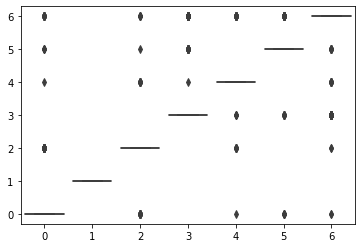



Relatório de classificação KNN: 
               precision    recall  f1-score   support

    Barbunya       0.94      0.89      0.92       437
      Bombay       1.00      1.00      1.00       172
        Cali       0.93      0.94      0.94       538
    Dermason       0.92      0.92      0.92      1170
       Horoz       0.96      0.95      0.96       636
       Seker       0.95      0.94      0.94       669
        Sira       0.84      0.88      0.86       870

    accuracy                           0.92      4492
   macro avg       0.94      0.93      0.93      4492
weighted avg       0.92      0.92      0.92      4492

Acurácia KNN(Holdout): 92.10%
Acurácia média KNN(k-fold): 64.20% 


In [96]:
#Aplicando o modelo KNN

#Definindo o valor de vizinhos
classifier = KNeighborsClassifier(n_neighbors=15)

#Treinar o modelo, com os dados de treinamento
classifier.fit(X_train_norm, y_train_bin)

#Prever os valores de y com dos dados de X_test
y_pred = classifier.predict(X_test_norm)

# Imprimindo a matriz confusa
print("Matriz Confusa KNN: ")
print(confusion_matrix(y_test_bin, y_pred), "\n")  

# Imprimindo o gráfico de caixa
print("Boxplot KNN: ")
sns.boxplot(x=y_test_bin,y=y_pred, data=df)
plt.show()
print("\n")  

# Imprimindo o relatório de classificação
print("Relatório de classificação KNN: \n", classification_report(y_test_bin, y_pred, target_names=labels))  

# Imprimindo o quão acurado foi o modelo
acu_knn = accuracy_score(y_test_bin, y_pred) * 100
print("Acurácia KNN(Holdout): {:.2f}%".format(acu_knn))

#Validação cruzada com k-fold e k=10
scores_knn = cross_val_score(classifier, X_test, y_test_bin, cv=10, scoring='accuracy')
print("Acurácia média KNN(k-fold): {:.2f}% ".format(scores_knn.mean()*100))

In [91]:
#Aplicando a Árvore de decisão

#Instanciando o modelo
model = DecisionTreeClassifier()

# Treinar o modelo
model.fit(X_train, y_train_bin)

# Aplicar o modelo ao treinamento e ao teste
predicted_test_y = model.predict(X_test)

predicted_train_y = model.predict(X_train)

In [92]:
# Imprimindo a matriz confusa
print("Matriz Confusa Decision Tree: ")
print(confusion_matrix(y_test_bin, predicted_test_y), "\n")  

# Imprimindo o relatório de classificação
print("Relatório de classificação Decision Tree: \n", classification_report(y_test_bin, predicted_test_y, target_names=labels)) 

#Imprimindo a acurácia do modelo
accuracy_dt = accuracy_score(y_test_bin, predicted_test_y) * 100
print("Acurácia Decision Tree(Holdout): {:.2f}%.".format(accuracy_dt))

#Validação cruzada com k-fold e k=10
scores_dt = cross_val_score(model, X_test, y_test_bin, cv=10, scoring='accuracy')
print("Acurácia média Decision Tree(k-fold): {:.2f}% ".format(scores_dt.mean()*100))

Matriz Confusa Decision Tree: 
[[ 394    0   25    0    2    4   12]
 [   1  170    1    0    0    0    0]
 [  30    0  482    0   20    1    5]
 [   0    0    0 1023    1   24  122]
 [   5    0   10    5  597    0   19]
 [   9    0    0   19    0  618   23]
 [  16    0    6   99   14   21  714]] 

Relatório de classificação Decision Tree: 
               precision    recall  f1-score   support

    Barbunya       0.87      0.90      0.88       437
      Bombay       1.00      0.99      0.99       172
        Cali       0.92      0.90      0.91       538
    Dermason       0.89      0.87      0.88      1170
       Horoz       0.94      0.94      0.94       636
       Seker       0.93      0.92      0.92       669
        Sira       0.80      0.82      0.81       870

    accuracy                           0.89      4492
   macro avg       0.91      0.91      0.91      4492
weighted avg       0.89      0.89      0.89      4492

Acurácia Decision Tree(Holdout): 89.00%.
Acurácia média Dec

In [94]:
#Aplicando a Random Forest

#Instanciando o modelo
rf = RandomForestClassifier(90, max_depth=10, random_state=42)
rf.fit(X_train,y_train_bin)

#Aplicando o modelo
y_pred_rf = rf.predict(X_test)

# Imprimindo a matriz confusa
print("Matriz Confusa Random Forest: ")
print(confusion_matrix(y_test_bin, y_pred_rf), "\n")  

# Imprimindo o relatório de classificação
print("Relatório de classificação Random Forest: \n", classification_report(y_test_bin, y_pred_rf, target_names=labels)) 

#Imprimindo a acurácia do modelo
accuracy_rf = accuracy_score(y_test_bin, y_pred_rf) * 100
print("Acurácia Random Forest(Holdout): {:.2f}%.".format(accuracy_rf))

#Validação cruzada com k-fold e k=10
scores_dt = cross_val_score(rf, X_test, y_test_bin, cv=10, scoring='accuracy')
print("Acurácia médiaRandom Forest(k-fold): {:.2f}% ".format(scores_dt.mean()*100))

Matriz Confusa Random Forest: 
[[ 389    0   29    0    0    4   15]
 [   2  170    0    0    0    0    0]
 [  20    0  496    0   14    1    7]
 [   0    0    0 1082    1   18   69]
 [   1    0    8    6  598    0   23]
 [   3    0    0   14    0  630   22]
 [   3    0    2   89    7   16  753]] 

Relatório de classificação Random Forest: 
               precision    recall  f1-score   support

    Barbunya       0.93      0.89      0.91       437
      Bombay       1.00      0.99      0.99       172
        Cali       0.93      0.92      0.92       538
    Dermason       0.91      0.92      0.92      1170
       Horoz       0.96      0.94      0.95       636
       Seker       0.94      0.94      0.94       669
        Sira       0.85      0.87      0.86       870

    accuracy                           0.92      4492
   macro avg       0.93      0.92      0.93      4492
weighted avg       0.92      0.92      0.92      4492

Acurácia Random Forest(Holdout): 91.67%.
Acurácia médiaRand

In [105]:
#Aplicando a Rede Neural MLP

#Instanciado o modelo
modelNN = Sequential()
modelNN.add(Dense(50, input_dim=16, activation='relu'))
modelNN.add(Dense(7, activation='softmax'))
modelNN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Vetorizar a classe resposta
lb = LabelBinarizer()
y_train_vet = lb.fit_transform(y_train)
y_test_vet = lb.fit_transform(y_test)

#Realizando o treinamento
modelNN.fit(X_train_norm, y_train_vet, batch_size=128, epochs=300, verbose=0, validation_data=(X_test_norm, y_test_vet))

#Avalidando a Rede Neural 
predictions = modelNN.predict(X_test_norm, batch_size=128)

# Imprimindo a matriz confusa
print("Matriz Confusa Rede Neural MLP: ")
print(confusion_matrix(y_test_vet.argmax(axis=1), predictions.argmax(axis=1)), "\n")  

# Imprimindo o relatório de classificação
print("Relatório de classificação Rede Neural MLP: \n", classification_report(y_test_vet.argmax(axis=1), predictions.argmax(axis=1), target_names=labels, zero_division=0))

#Imprimindo a acurácia do modelo
accuracy_nn = accuracy_score(y_test_vet.argmax(axis=1), predictions.argmax(axis=1)) * 100
print("Acurácia Rede Neural MLP(Holdout): {:.2f}%.".format(accuracy_nn))

#Validação cruzada com k-fold e k=10
#scores_nn = cross_val_score(modelNN, X_test_norm, y_test_vet, cv=10, scoring='neg_mean_absolute_error')
print("Acurácia média Rede Neural MLP(k-fold): {:.2f}% ".format(scores_nn.mean()*100))

Matriz Confusa Rede Neural MLP: 
[[ 401    0   19    0    2    5   10]
 [   0  172    0    0    0    0    0]
 [  15    0  505    0    9    1    8]
 [   1    0    0 1091    3   15   60]
 [   2    0    6    8  606    0   14]
 [   5    0    1   13    0  637   13]
 [   2    0    2   82    9    8  767]] 

Relatório de classificação Rede Neural MLP: 
               precision    recall  f1-score   support

    Barbunya       0.94      0.92      0.93       437
      Bombay       1.00      1.00      1.00       172
        Cali       0.95      0.94      0.94       538
    Dermason       0.91      0.93      0.92      1170
       Horoz       0.96      0.95      0.96       636
       Seker       0.96      0.95      0.95       669
        Sira       0.88      0.88      0.88       870

    accuracy                           0.93      4492
   macro avg       0.94      0.94      0.94      4492
weighted avg       0.93      0.93      0.93      4492

Acurácia Rede Neural MLP(Holdout): 93.03%.


NameError: ignored

In [2]:
#Ensamble de Redes Neurais



In [69]:
#Ensamble heterogêneo

#Instanciando o modelo
rfr = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Treinando o modelo no dataset de treino
rfr.fit(X_train, y_train_vet)

#Aplicando o modelo
y_pred_en = rfr.predict(X_test)

#Avaliando o desempenho através do erro médio absoluto
score_en = -1*cross_val_score(rfr, X_test, y_test_vet, cv = 10, scoring = 'neg_mean_absolute_error').mean()*100
print(score_en)
#Calcula o erro absoluto
#errors = abs(y_pred_en - y_test_vet)

#Calcula a porcentagem do erro absoluto medio(MAPE)
#mape = 100 * (errors / y_test_vet)

# Imprimindo a matriz confusa
#print("Matriz Confusa Ensamble heterogêneo: ")
#print(confusion_matrix(y_test_bin, y_pred_en, "\n"))  

# Imprimindo o relatório de classificação
#print("Relatório de classificação Ensamble heterogêneo: \n", classification_report(y_test_bin, y_pred_en, target_names=labels))

#Imprimindo a acurácia do modelo
#accuracy_en = accuracy_score(y_test_bin, y_pred_en) * 100
#print("Acurácia Ensamble heterogêneo: {:.2f}%.".format(accuracy_en))
#accuracy_en = 100 - np.mean(mape)
#print('Acurácia Ensamble heterogêneo:', round(accuracy_en, 2), '%.')

3.4635451338070498
